In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Code du TP

In [2]:
from qs import QS

In [77]:
from waterfall import Waterfall

In [4]:
# === Lambda parameters ===

tags_mean_dist = 5 # mean distance between incoming tags, in seconds
lambda_a = 1. / tags_mean_dist

k_test = 2 # number of servers in the test queue, i.e. number of tags that can be tested simultaneously
test_mean_dist = 10 # mean treatment time for a tag, in seconds (duration of the testsuite)
mu_t = 1. / test_mean_dist
lambda_t = mu_t * k_test

k_front = 1 # always 1 server
front_mean_dist = 1. # mean time to transfer the result of a tag to the front of the user, in seconds
mu_d = 1. / front_mean_dist
lambda_d = mu_d * k_front

# === Queue sizes === 
q_test_size = None # infinite
q_front_size = None # infinite

waterfall = Waterfall(
    lambda_a=lambda_a,
    lambda_t=lambda_t,
    lambda_d=lambda_d,
    nb_servers_test=k_test,
    nb_servers_front=k_front,
    q_test_size=q_front_size,
    q_front_size=q_front_size,
    size=100
)

In [5]:
waterfall.run()

waterfall_stats = waterfall.posttreat()

In [6]:
waterfall_stats

{'Test Queue':                    run value
 mean_sojourn_time   6.679029
 mean_waiting_time   1.636487
 mean_service_time   5.042542
 waiting_proportion      0.43
 blocked_proportion       0.0
 servers_max_usage   0.386935,
 'Front Queue':                    run value
 mean_sojourn_time   3.975519
 mean_waiting_time   3.028466
 mean_service_time   0.947053
 waiting_proportion      0.47
 blocked_proportion       0.0
 servers_max_usage   0.231156}

In [7]:
timeline = waterfall.timeline()

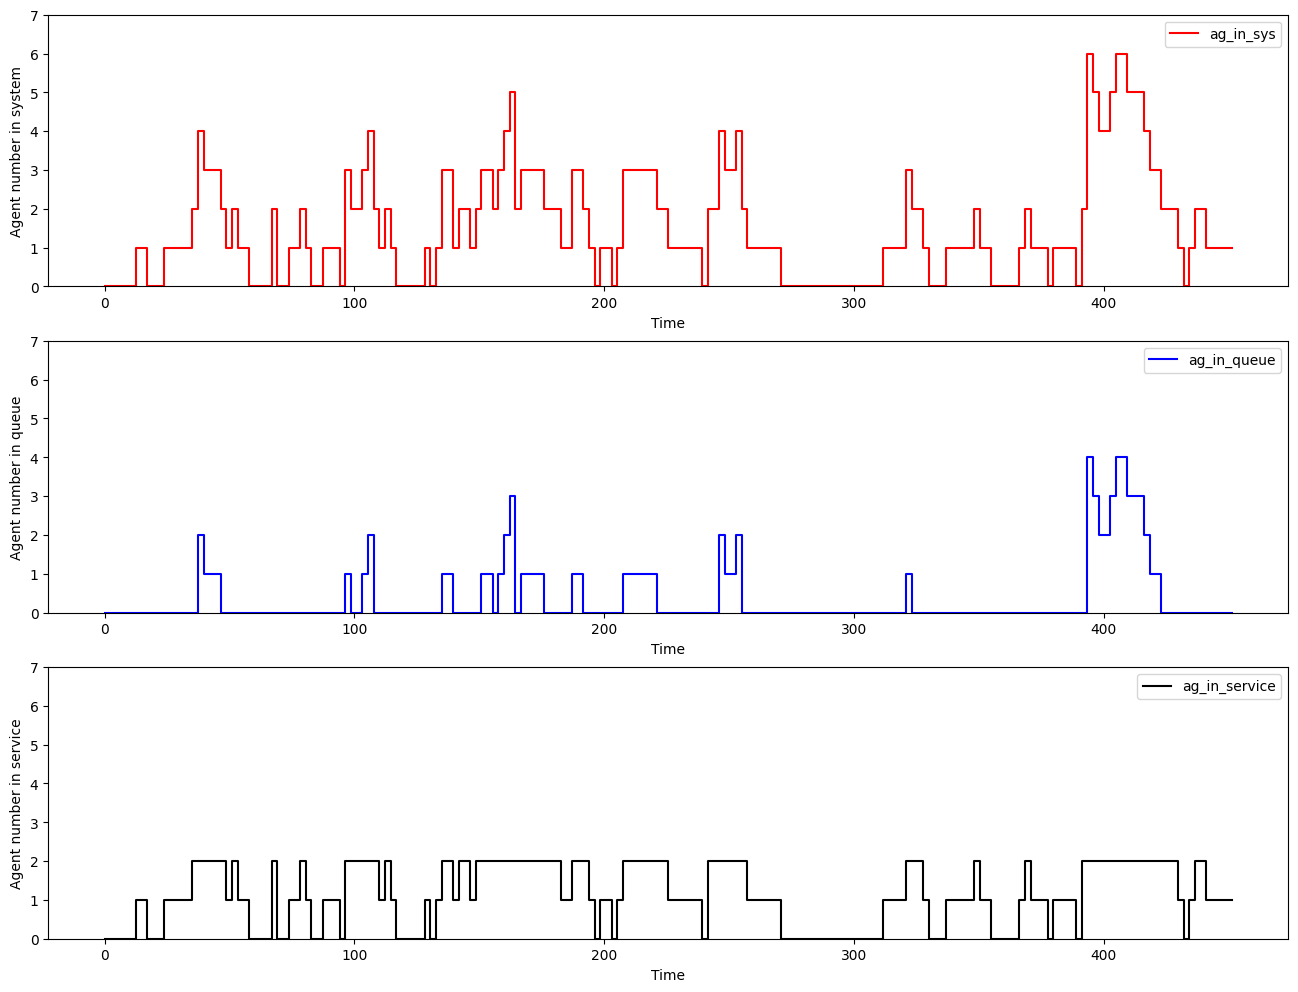

In [8]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
counts = ['ag_in_sys','ag_in_queue','ag_in_service']
labels = ['system', 'queue', 'service']
colors = ['red', 'blue', 'black']

for i in range(3):
    timeline['Test Process'].plot(y= counts[i], 
                   use_index=True, ax=axes[i], linewidth=1.5,drawstyle='steps-mid', color=f'{colors[i]}',
                   ylabel=f'Agent number in {labels[i]}', xlabel='Time', ylim=[0,max(timeline['Test Process']['ag_in_sys']+1)])

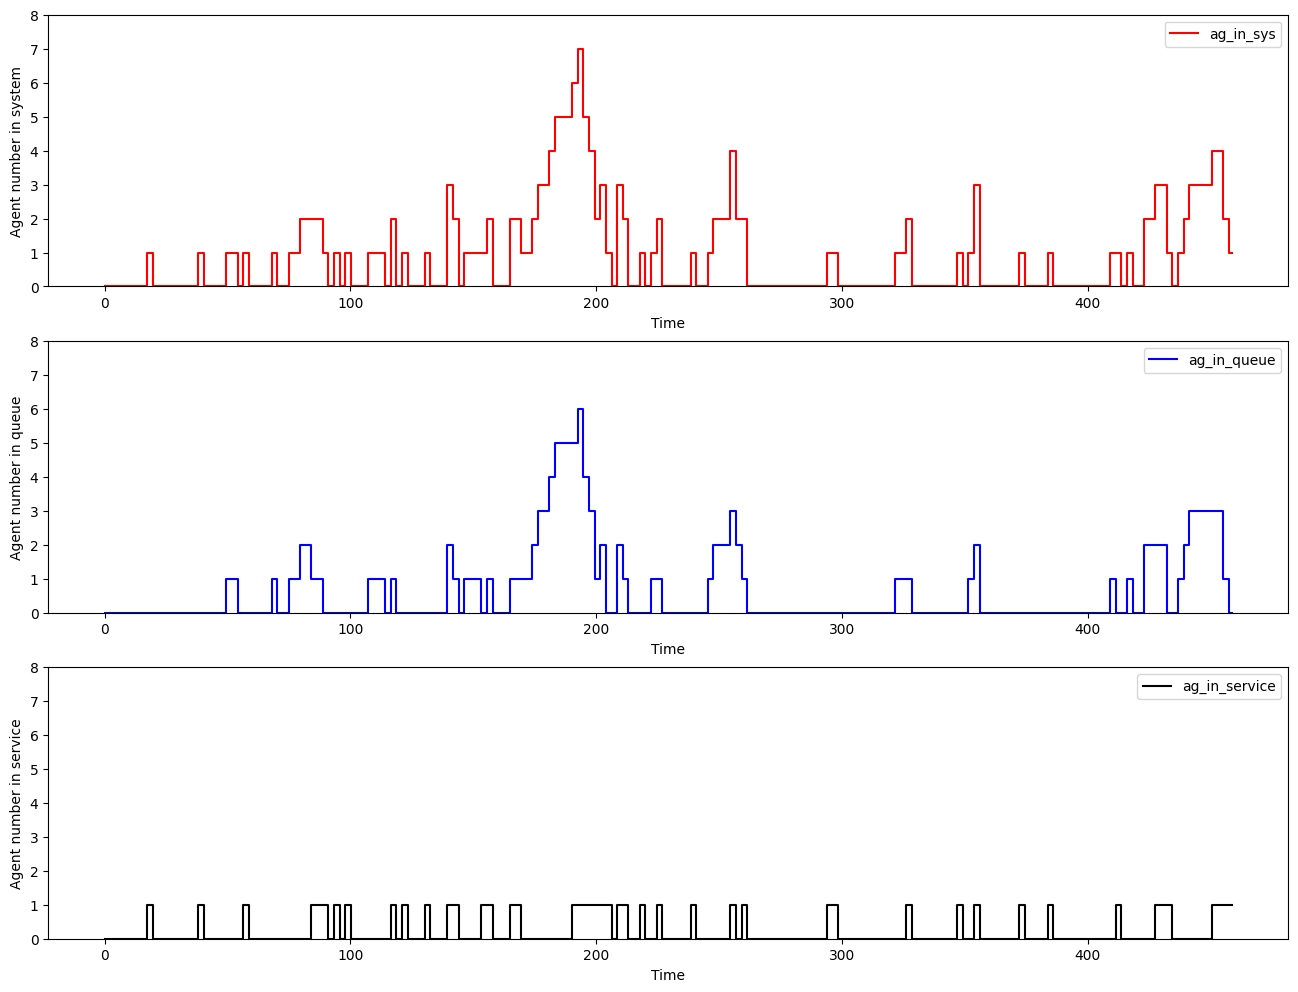

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
counts = ['ag_in_sys','ag_in_queue','ag_in_service']
labels = ['system', 'queue', 'service']
colors = ['red', 'blue', 'black']

for i in range(3):
    timeline['Front Process'].plot(y= counts[i], 
                   use_index=True, ax=axes[i], linewidth=1.5,drawstyle='steps-mid', color=f'{colors[i]}',
                   ylabel=f'Agent number in {labels[i]}', xlabel='Time', ylim=[0,max(timeline['Front Process']['ag_in_sys']+1)])

---

In [17]:
# === Scenario 1 ===

# Une journée type sans rendu (9h-00h), avec unité de temps en minutes et lambda_a constant.

total_tags = 15000 # total number of tags for scenario -> 500 students, 10 exercices in a day, mean 3 tags per exercice

lambda_a = 16.67 # number of tags per minute

k_test = 16 # number of servers in the test queue, i.e. number of tags that can be tested simultaneously
test_mean_dist = 1. # mean treatment time for a tag, in minutes (duration of the testsuite) (maybe reduce)
mu_t = 1. / test_mean_dist
lambda_t = mu_t * k_test

k_front = 1 # always 1 server
front_mean_dist = 1./12 # (5 seconds) mean time to transfer the result of a tag to the front of the user, in minutes
mu_d = 1. / front_mean_dist
lambda_d = mu_d * k_front

# === Queue sizes === 
q_test_size = None # infinite
q_front_size = None # infinite

waterfall = Waterfall(
    lambda_a=lambda_a,
    lambda_t=lambda_t,
    lambda_d=lambda_d,
    nb_servers_test=k_test,
    nb_servers_front=k_front,
    q_test_size=q_front_size,
    q_front_size=q_front_size,
    size=total_tags
)

In [18]:
waterfall.run()

waterfall_stats = waterfall.posttreat()

In [19]:
waterfall_stats

{'Test Queue':                    run value
 mean_sojourn_time   0.062693
 mean_waiting_time        0.0
 mean_service_time   0.062693
 waiting_proportion       0.0
 blocked_proportion       0.0
 servers_max_usage        0.0,
 'Front Queue':                      run value
 mean_sojourn_time   180.779687
 mean_waiting_time   180.695988
 mean_service_time     0.083699
 waiting_proportion    0.999667
 blocked_proportion         0.0
 servers_max_usage     0.999633}

In [20]:
timeline = waterfall.timeline()

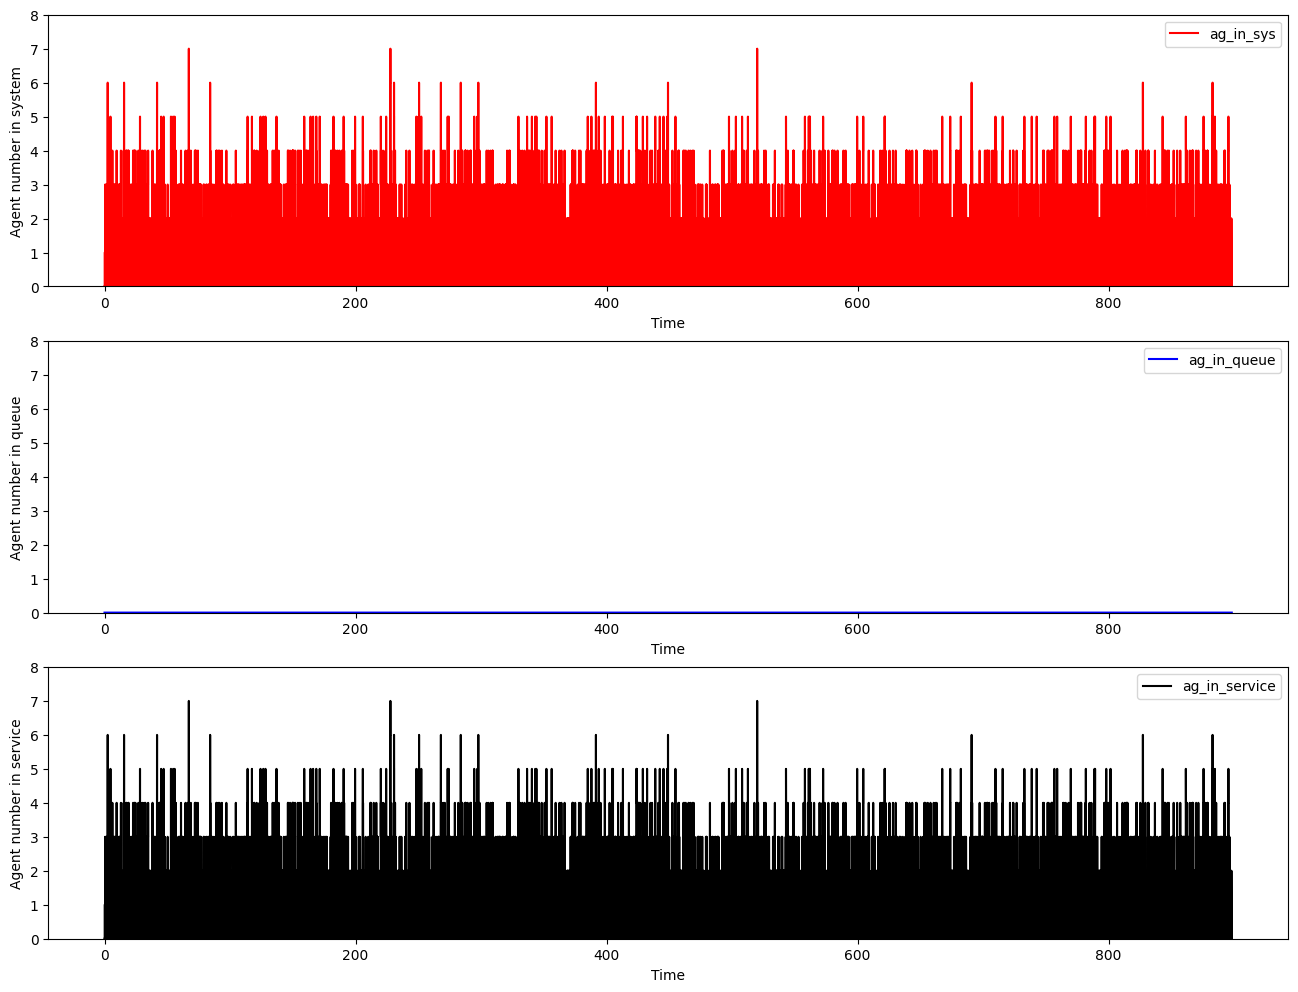

In [21]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
counts = ['ag_in_sys','ag_in_queue','ag_in_service']
labels = ['system', 'queue', 'service']
colors = ['red', 'blue', 'black']

for i in range(3):
    timeline['Test Process'].plot(y= counts[i], 
                   use_index=True, ax=axes[i], linewidth=1.5,drawstyle='steps-mid', color=f'{colors[i]}',
                   ylabel=f'Agent number in {labels[i]}', xlabel='Time', ylim=[0,max(timeline['Test Process']['ag_in_sys']+1)])

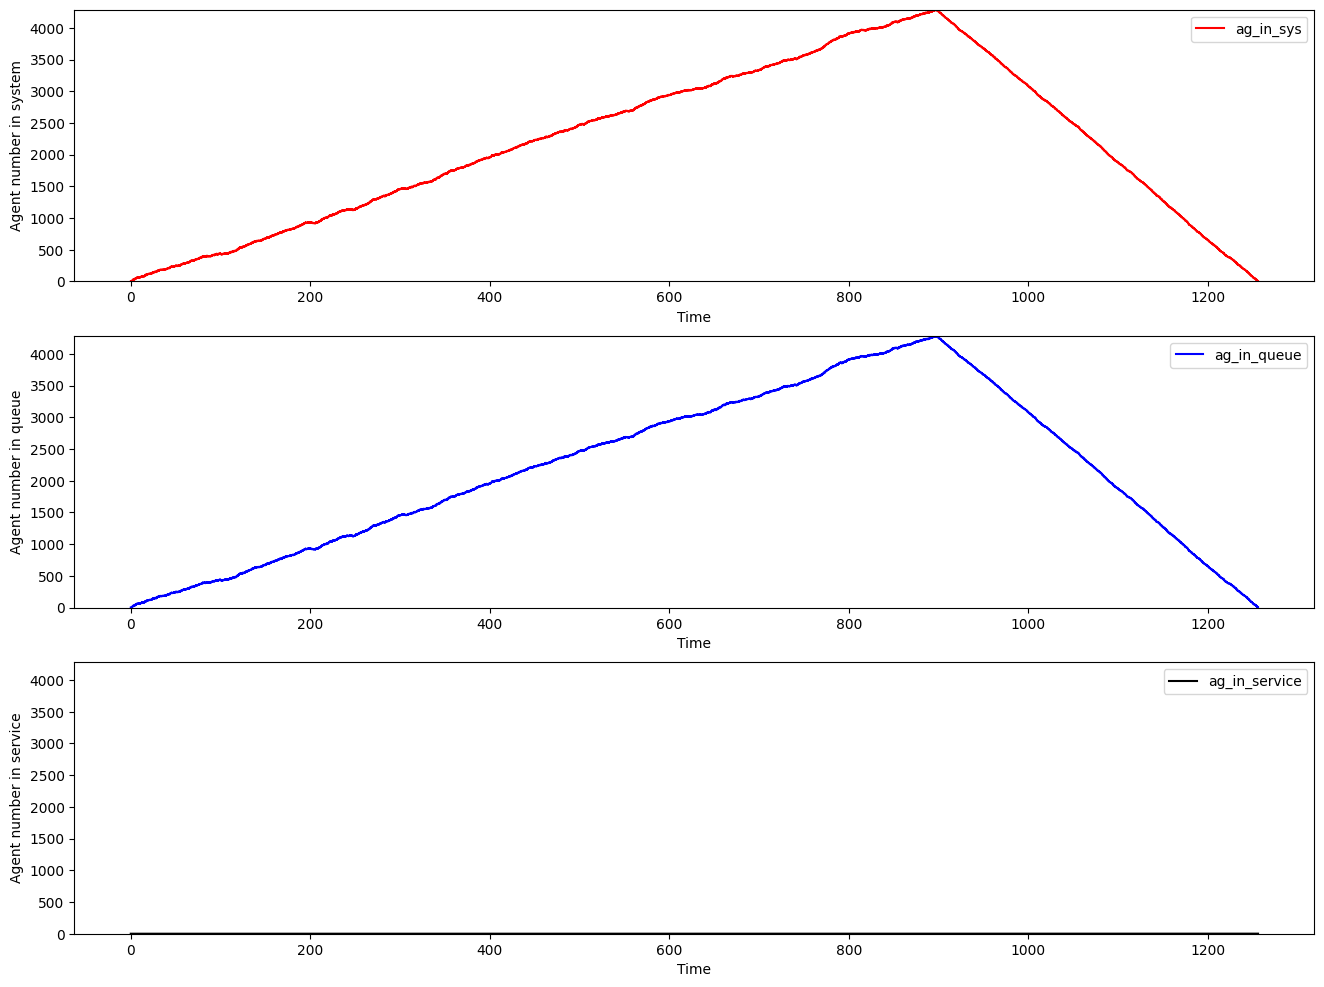

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
counts = ['ag_in_sys','ag_in_queue','ag_in_service']
labels = ['system', 'queue', 'service']
colors = ['red', 'blue', 'black']

for i in range(3):
    timeline['Front Process'].plot(y= counts[i], 
                   use_index=True, ax=axes[i], linewidth=1.5,drawstyle='steps-mid', color=f'{colors[i]}',
                   ylabel=f'Agent number in {labels[i]}', xlabel='Time', ylim=[0,max(timeline['Front Process']['ag_in_sys']+1)])

---

In [11]:
# === Scenario 2 ===

# Une heure de pointe avant un rendu, avec unité de temps en seconde et lambda_a constant (mais plus élevé).

total_tags = 4000 # total number of tags for scenario -> 500 students, 1 exercice to submit, 8 tags for this rush hour

lambda_a = 1.11 # number of tags per second

k_test = 16 # number of servers in the test queue, i.e. number of tags that can be tested simultaneously
test_mean_dist = 120. # mean treatment time for a tag, in seconds (duration of the testsuite) (maybe reduce)
mu_t = 1. / test_mean_dist
lambda_t = mu_t * k_test

k_front = 1 # always 1 server
front_mean_dist = 5. # mean time to transfer the result of a tag to the front of the user, in seconds
mu_d = 1. / front_mean_dist
lambda_d = mu_d * k_front

# === Queue sizes === 
q_test_size = None # infinite
q_front_size = None # infinite

waterfall = Waterfall(
    lambda_a=lambda_a,
    lambda_t=lambda_t,
    lambda_d=lambda_d,
    nb_servers_test=k_test,
    nb_servers_front=k_front,
    q_test_size=q_front_size,
    q_front_size=q_front_size,
    size=total_tags # total number of tags for scenario
)

In [12]:
waterfall.run()

waterfall_stats = waterfall.posttreat()

In [13]:
waterfall_stats

{'Test Queue':                    run value
 mean_sojourn_time   7.275733
 mean_waiting_time   0.005588
 mean_service_time   7.270145
 waiting_proportion    0.0105
 blocked_proportion       0.0
 servers_max_usage   0.009876,
 'Front Queue':                       run value
 mean_sojourn_time   8339.206522
 mean_waiting_time   8334.119327
 mean_service_time      5.087195
 waiting_proportion      0.99925
 blocked_proportion          0.0
 servers_max_usage       0.99975}

In [14]:
timeline = waterfall.timeline()

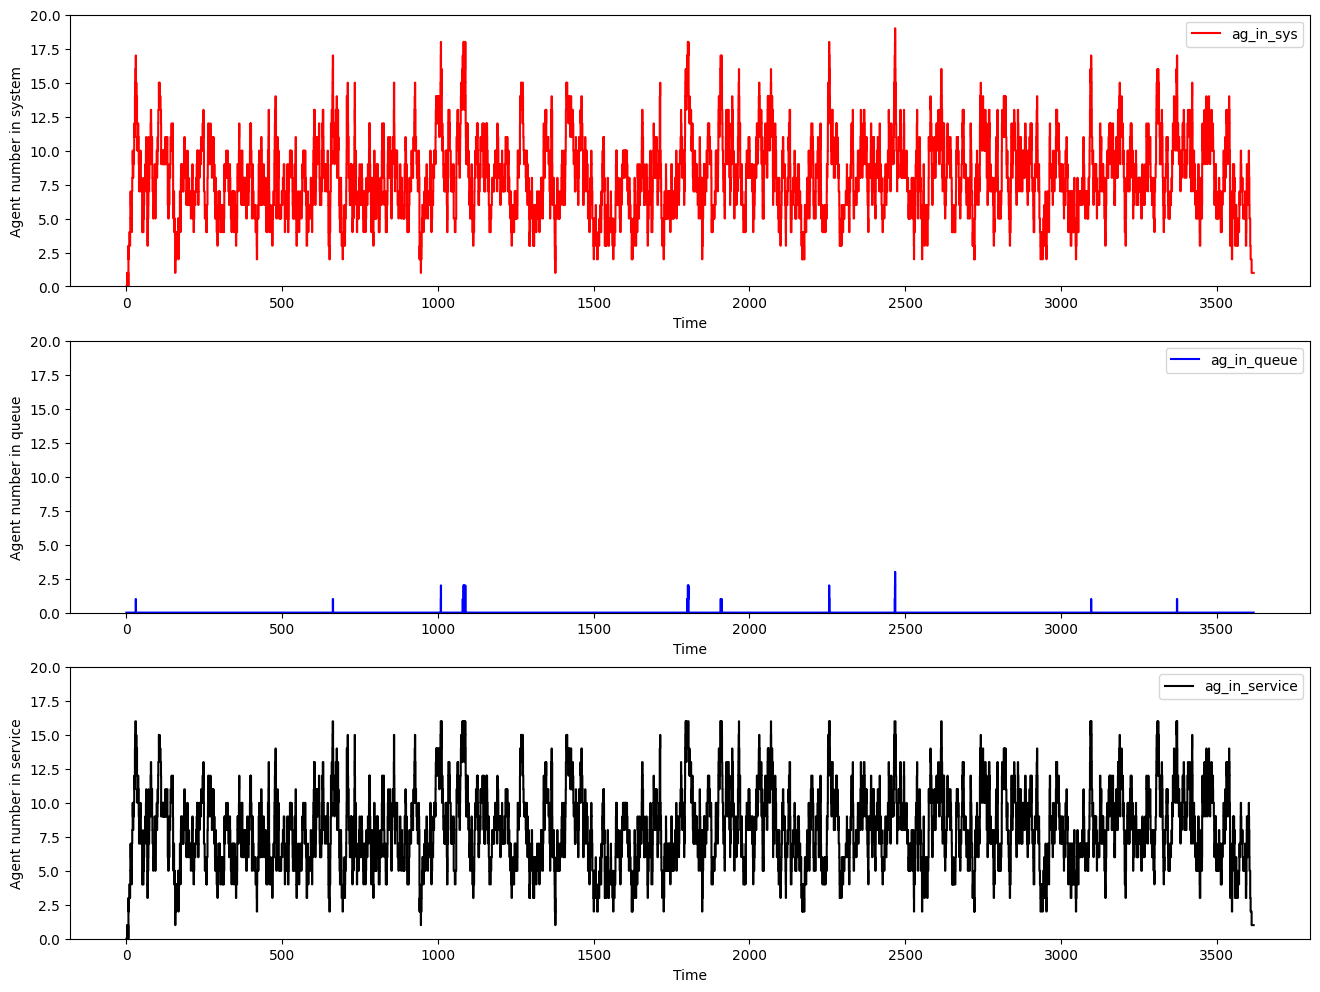

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
counts = ['ag_in_sys','ag_in_queue','ag_in_service']
labels = ['system', 'queue', 'service']
colors = ['red', 'blue', 'black']

for i in range(3):
    timeline['Test Process'].plot(y= counts[i], 
                   use_index=True, ax=axes[i], linewidth=1.5,drawstyle='steps-mid', color=f'{colors[i]}',
                   ylabel=f'Agent number in {labels[i]}', xlabel='Time', ylim=[0,max(timeline['Test Process']['ag_in_sys']+1)])

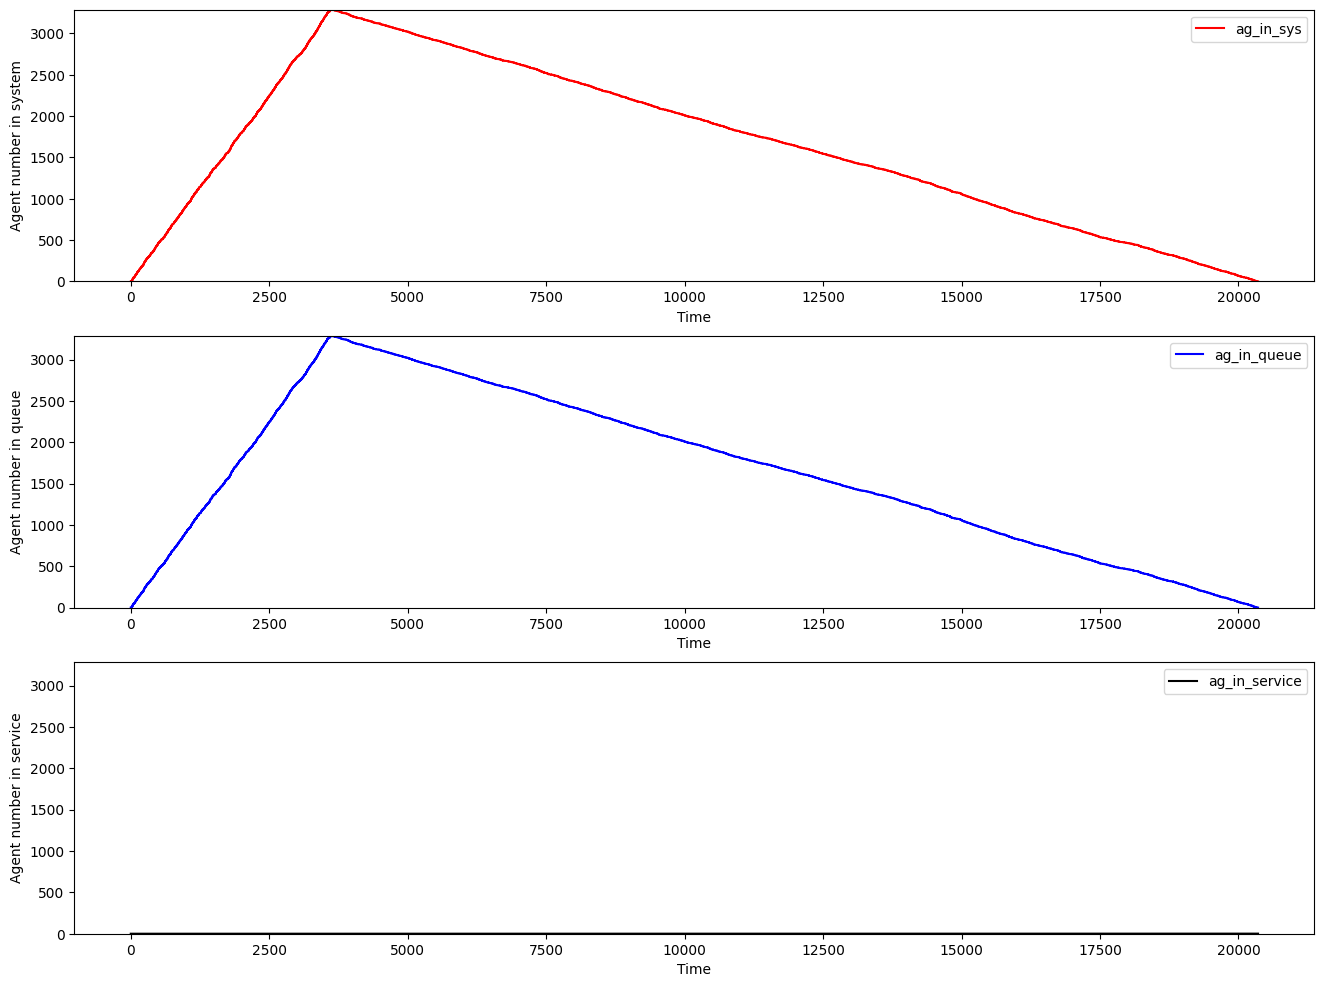

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))
counts = ['ag_in_sys','ag_in_queue','ag_in_service']
labels = ['system', 'queue', 'service']
colors = ['red', 'blue', 'black']

for i in range(3):
    timeline['Front Process'].plot(y= counts[i], 
                   use_index=True, ax=axes[i], linewidth=1.5,drawstyle='steps-mid', color=f'{colors[i]}',
                   ylabel=f'Agent number in {labels[i]}', xlabel='Time', ylim=[0,max(timeline['Front Process']['ag_in_sys']+1)])